--Define the process that you will follow to thoroughly analyze the data found in the Credit One dataset. You may choose either framework, but you'll need to review all of the questions in each based on your quick examination of the Credit One data.--

*Note that both of these process frameworks are iterative. A poor or unexpected outcome at any step might necessitate returning to previous steps. And if the problem is business critical, the process might be re-executed regularly.

Framework One - Zumel and Mount, Practical Data Science with R, chapter 1:

Define the goal The first step in a data science process is to define a measurable and quantifiable goal.

Why do the stakeholders want to do the project?
    Credit One has seen an increase in the number of customers who have defaulted on loans
What do they need from it?
Why is their current solution inadequate?
What resources do you need?
How will the result of your project be deployed?
Collect and manage data This step includes identifying the data you need, then exploring and conditioning it. This is often the most time consuming step.

What data is available?
Will it help to solve the problem? Is it enough?
Is the data quality good enough?
Build the model Here is where you try to extract useful insights from the data in order to achieve your goals.

Which techniques might I apply to build the model?
How many techniques should I apply?
Evaluate and critique the model Once you have derived a model, you need to determine whether it meets your goals. If not, it’s time to loop back to the modeling step.

Is the model accurate enough to meet the stakeholders’ needs?
Does it perform better than "the obvious guess" and any techniques being used currently?
Do the results of the model make sense in the context of the real-world problem domain?
Present results and document Once you have a model that meets your criteria, you will present your results to your project sponsor and   other stakeholders.

How should stakeholders interpret the model?
How confident should they be in its predictions?
When should they potentially overrule the model’s predictions?
Deploy and maintain the model Finally the model is put into production, but you still need to ensure that the model will run smoothly. In many cases this requires enhancement of the requirements based on customer feedback or in some cases fixing bugs.

How is the model to be handed off to "production"?
How often, and under which circumstances, should the model be revised?
Framework Two - BADIR (Jain and Sharma, Behind Every Good Decision, chapter 4):

Business question

What is the stated business question?
What is the intent underlying the question (e.g., what is the context, what is the impacted segment, and what are stakeholders’ current thoughts about the underlying reasons?
What business considerations (e.g., stakeholders, timeline, and cost) are likely to impact the analysis?
Analysis plan

What is the analysis goal?
What hypotheses are to be tested?
What data is required/available to test the hypotheses?
What methodology(-ies) will you employ?
What is the project plan (timeline and milestones, risks, phasing, prioritization, …)?
Data collection

From where can the data be obtained?
How must the data be cleansed and validated?
Insights

What patterns do you see in the data?
Are each of the hypotheses proven or disproven?
How much confidence should stakeholders place in the results?
How do you rank your findings in terms of quantified impact on the business?
Recommendation

How can you most effectively present the results of your analysis to your stakeholders (in terms they can understand and in alignment with information they’ll value)?
Note: A generic template for a recommendation presentation or report might include:
Objective
Background (optional)
Scope (optional)
Approach (optional)
Recommendations
Key insights with impact
Next steps

X1: Amount of the given credit (NT dollar): it includes both the individual consumer
credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from
April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7
= the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.
The measurement scale for the repayment status is:
-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay
for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight
months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in
September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of
bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September,
2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
Y: client's behavior; Y=0 then not default, Y=1 then default"

https://docs.google.com/document/d/1P8ZZobV-0hD8F5UG5MfshJ23CCUJOqJ0b42rMPdcxkQ/edit


In [ ]:
from sqlalchemy import create_engine
!pip install PyMySQL
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip uninstall -y pandas-profiling
!pip install pandas-profiling
import pandas_profiling
#!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

#allows Colab to write file to Google Drive
  #from google.colab import drive
  #drive.mount('/drive')


connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

df = pd.read_sql('SELECT * FROM credit', con=connection)

#showing heading for the data frame
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.1 MB/s 
Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Successfully uninstalled pandas-profiling-1.4.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 2.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 102 kB 51.6 MB/s 
     |████████████████████████████████| 4.7 MB 31.0 MB/s 
     |████████████████████████████████| 309 kB 49.3 MB/s 
     |████████████████████████████████| 9.8 MB 43.7 MB/s 
     |████████████████████████████████| 690 kB 54.5 MB/s 
     |████████████████████████████████| 296 kB 64.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=2820d7d8e5916d5805ab3d8e0a2d70d2f941d0dde00ff085049900a3c9

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [ ]:
#Creates file to drive
#df.to_csv('/drive/My Drive/Colab_Notebooks/C2.csv')

In [ ]:
#After looking at data, starting in row 2398, data duplicates

-LIMIT_BAL, X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
SEX, ordinal --> convert to numeric
#Education, ordinal --> convert to numeric
#LIMIT_BAL --> maybe discretize

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [ ]:
df.describe

<bound method NDFrame.describe of 0    LIMIT_BAL     SEX    EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
1        20000  female   university        1  24     2     2    -1    -1   
2       120000  female   university        2  26    -1     2     0     0   
3        90000  female   university        2  34     0     0     0     0   
4        50000  female   university        1  37     0     0     0     0   
5        50000    male   university        1  57    -1     0    -1     0   
...        ...     ...          ...      ...  ..   ...   ...   ...   ...   
3665    220000  female   university        1  32     0     0     0     0   
3666     70000  female   university        2  34     1     2     2     2   
3667    120000    male   university        2  37    -1     2     0     0   
3668    180000  female   university        2  32     0     0     0     0   
3669     50000  female  high school        1  57     0     0     0     0   

0    PAY_5  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT

In [ ]:
df.dtypes

0
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [ ]:
corr_mat = df.corr()
print(corr_mat)
#Empty DataFrame because it is object and not int

Empty DataFrame
Columns: []
Index: []


In [ ]:
df.duplicated()
#duplicates are seen

1       False
2       False
3       False
4       False
5       False
        ...  
3665     True
3666     True
3667     True
3668     True
3669     True
Length: 3669, dtype: bool

In [ ]:
cleanData = df.drop_duplicates()

In [ ]:
clean = cleanData.drop([2398])

In [ ]:
cleanData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [ ]:
clean.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2393,50000,male,high school,1,32,2,3,2,2,2,...,41526,42209,44960,1500,1600,1700,1500,3600,0,default
2394,20000,female,high school,2,49,0,0,2,0,-1,...,10400,1150,0,3008,0,600,1150,0,0,not default
2395,130000,female,university,2,24,1,-2,-1,-1,-1,...,-3,998,937,0,3372,0,1001,939,1013,not default
2396,110000,female,high school,1,27,0,0,0,0,0,...,47316,47175,47141,2326,3000,1807,1698,1911,1808,not default
2397,200000,male,university,1,29,0,0,0,2,2,...,48367,49366,47539,2078,3900,1900,1904,12,5224,not default


In [ ]:
#drop index
#LOOK INTO THIS: it is making the LIMIT BAL the index. Good for report, bad for correlation
#cleanNoIndex = clean.set_index('LIMIT_BAL', inplace=True)

In [ ]:
#calling columns after the first two

for i in clean.columns:
    try:
        #for any number, try to change it to int
        clean [[i]] = clean [[i]].astype(float).astype(int)
        #if it cannot be changed, pass the object
    except:
        pass

In [ ]:
clean.dtypes

0
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [ ]:
#NOTES: need to change sex, education and dft payment into int using formulas using boolean? Not sure would help.
#Either that or marriage needs to be labeled appropriately 
#What should be dependent variable for bar graphs that would be helpful? 

In [ ]:
MarriageLabels = ['Not Married', 'Married']
values = ["Not Married" if x == 1 else 
          "Married" if x == 2 else  
          x for x in clean.MARRIAGE]
#set labels to marriage by using new variable

clean.loc[clean['MARRIAGE'] == 1, 'values'] = 'Not Married'
clean.loc[clean['MARRIAGE'] == 2, 'values'] = 'Married'

In [ ]:
# Age discritization
def ageBucket(AGE):
    
    if AGE < 30:
        return '18-29'
    if AGE < 40:
        return '30-39'
    if AGE < 65:
        return '40-64'
    else:
        return '65-85'

In [ ]:
clean.describe

<bound method NDFrame.describe of 0     LIMIT_BAL     SEX    EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
1         20000  female   university         1   24      2      2     -1   
2        120000  female   university         2   26     -1      2      0   
3         90000  female   university         2   34      0      0      0   
4         50000  female   university         1   37      0      0      0   
5         50000    male   university         1   57     -1      0     -1   
...         ...     ...          ...       ...  ...    ...    ...    ...   
2393      50000    male  high school         1   32      2      3      2   
2394      20000  female  high school         2   49      0      0      2   
2395     130000  female   university         2   24      1     -2     -1   
2396     110000  female  high school         1   27      0      0      0   
2397     200000    male   university         1   29      0      0      0   

0     PAY_4  PAY_5  ...  BILL_AMT5  BILL_AMT6  PAY_AM

In [ ]:
print(clean.isnull().sum())

0
LIMIT_BAL                      0
SEX                            0
EDUCATION                      0
MARRIAGE                       0
AGE                            0
PAY_0                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                      0
BILL_AMT2                      0
BILL_AMT3                      0
BILL_AMT4                      0
BILL_AMT5                      0
BILL_AMT6                      0
PAY_AMT1                       0
PAY_AMT2                       0
PAY_AMT3                       0
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                       0
default payment next month     0
values                        39
dtype: int64


In [ ]:
clean.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,values
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,default,Not Married
2,120000,female,university,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,Married
3,90000,female,university,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,Married
4,50000,female,university,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,Not Married
5,50000,male,university,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,Not Married


In [ ]:
#Correlation
corr_mat = clean.corr()
print(corr_mat)

0          LIMIT_BAL  MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
0                                                                        
LIMIT_BAL   1.000000 -0.147788  0.154974 -0.200540 -0.248233 -0.236194   
MARRIAGE   -0.147788  1.000000 -0.420270  0.025893  0.037293  0.038955   
AGE         0.154974 -0.420270  1.000000 -0.017835 -0.029903 -0.037790   
PAY_0      -0.200540  0.025893 -0.017835  1.000000  0.637668  0.547805   
PAY_2      -0.248233  0.037293 -0.029903  0.637668  1.000000  0.763806   
PAY_3      -0.236194  0.038955 -0.037790  0.547805  0.763806  1.000000   
PAY_4      -0.224340  0.046826 -0.024571  0.497509  0.667189  0.812452   
PAY_5      -0.213442  0.044533 -0.012634  0.472577  0.639244  0.724154   
PAY_6      -0.210881  0.041117 -0.009462  0.445626  0.606825  0.669614   
BILL_AMT1   0.361823 -0.040450  0.068263  0.171638  0.225230  0.195056   
BILL_AMT2   0.361342 -0.037658  0.061591  0.175226  0.229758  0.220140   
BILL_AMT3   0.365711 -0.047310  0.0659

In [ ]:
#covarience
cov_mat = clean.cov()
print(cov_mat)

0             LIMIT_BAL      MARRIAGE            AGE         PAY_0  \
0                                                                    
LIMIT_BAL  1.676861e+10 -10058.566644  189691.134493 -29175.023787   
MARRIAGE  -1.005857e+04      0.276248      -2.087939      0.015290   
AGE        1.896911e+05     -2.087939      89.346812     -0.189402   
PAY_0     -2.917502e+04      0.015290      -0.189402      1.262192   
PAY_2     -3.882758e+04      0.023676      -0.341421      0.865345   
PAY_3     -3.815289e+04      0.025540      -0.445582      0.767712   
PAY_4     -3.417397e+04      0.028952      -0.273211      0.657512   
PAY_5     -3.197111e+04      0.027074      -0.138139      0.614136   
PAY_6     -3.227379e+04      0.025541      -0.105708      0.591692   
BILL_AMT1  3.648630e+09  -1655.601465   50246.908772  15016.264546   
BILL_AMT2  3.532902e+09  -1494.415030   43956.155322  14863.644606   
BILL_AMT3  3.297613e+09  -1731.488883   43395.642119  13569.784507   
BILL_AMT4  3.313588e

In [ ]:
#pandas_profiling.ProfileReport(clean)

In [ ]:
cleanData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [ ]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2397 entries, 1 to 2398
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   2397 non-null   object
 1   SEX                         2397 non-null   object
 2   EDUCATION                   2397 non-null   object
 3   MARRIAGE                    2397 non-null   object
 4   AGE                         2397 non-null   object
 5   PAY_0                       2397 non-null   object
 6   PAY_2                       2397 non-null   object
 7   PAY_3                       2397 non-null   object
 8   PAY_4                       2397 non-null   object
 9   PAY_5                       2397 non-null   object
 10  PAY_6                       2397 non-null   object
 11  BILL_AMT1                   2397 non-null   object
 12  BILL_AMT2                   2397 non-null   object
 13  BILL_AMT3                   2397 non-null   obje

In [ ]:
cleanData.groupby('LIMIT_BAL')['LIMIT_BAL'].count()

LIMIT_BAL
10000         37
100000        75
1000000        1
110000        55
120000        60
            ... 
70000         59
700000         1
80000        108
90000         64
LIMIT_BAL      1
Name: LIMIT_BAL, Length: 63, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


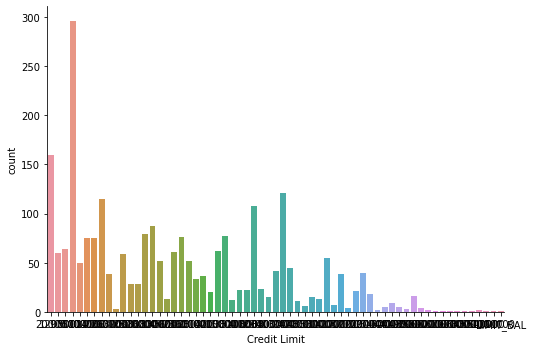

In [ ]:
fg = sns.factorplot('LIMIT_BAL', data=cleanData, kind='count', aspect=1.5)
fg.set_xlabels('Credit Limit')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


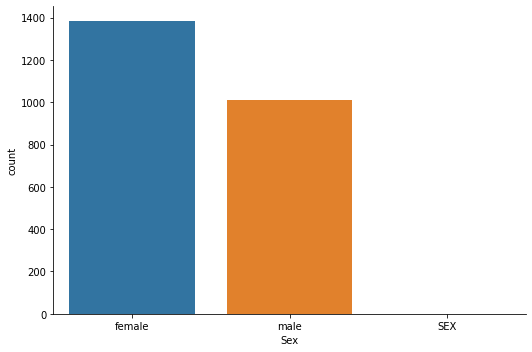

In [ ]:
fg = sns.factorplot('SEX', data=cleanData, kind='count', aspect=1.5)
fg.set_xlabels('Sex')

In [ ]:
clean.AGE.describe()

count    2396.000000
mean       35.419866
std         9.452344
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        75.000000
Name: AGE, dtype: float64

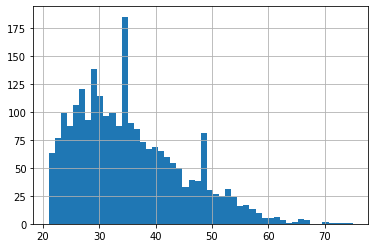

In [ ]:
# Another way to plot a histogram of ages is shown below
clean['AGE'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


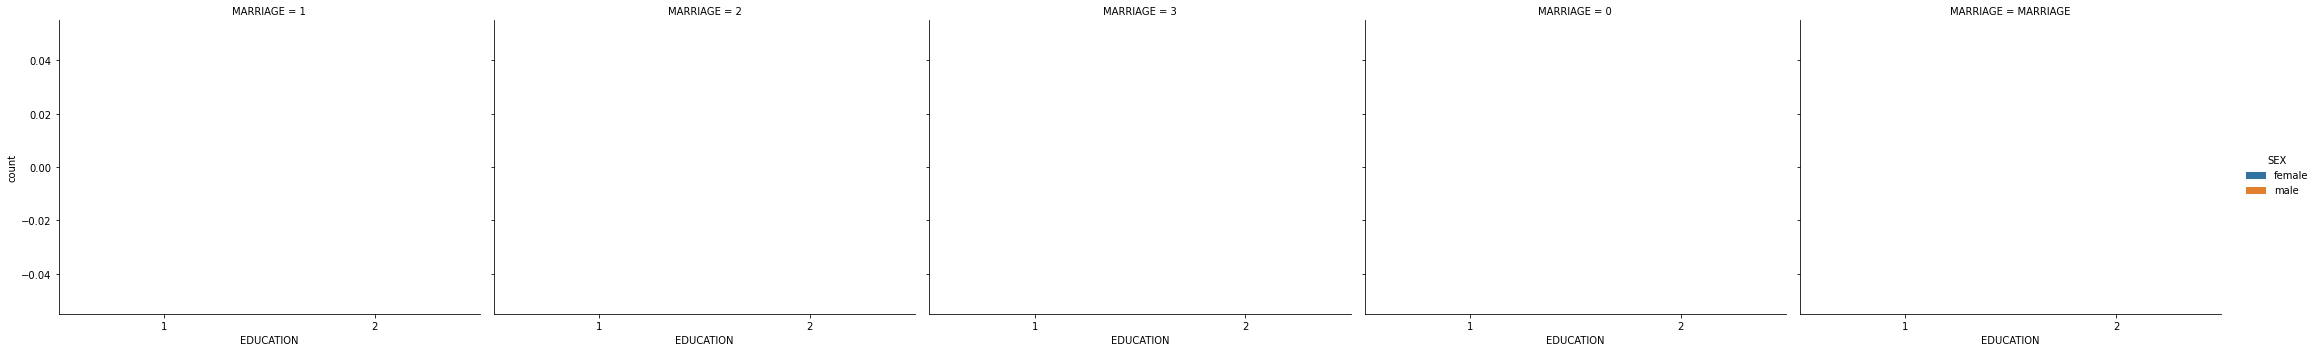

In [ ]:
# Do the same as above, but split the passengers into either survived or not
sns.factorplot('EDUCATION', data=cleanData, kind='count', hue='SEX', col='MARRIAGE', order=[1,2], 
               hue_order=['female','male'], aspect=1.25, size=5)

KeyError: ignored

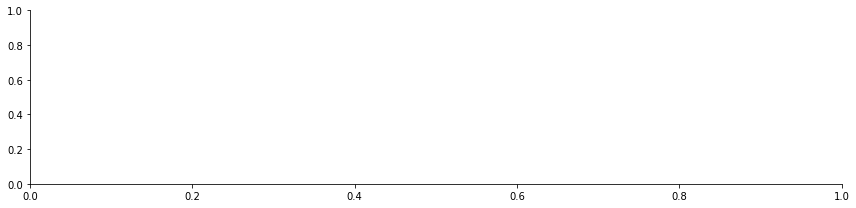

In [ ]:
fig = sns.FacetGrid(cleanData, hue='SEX', aspect=4)
fig.map(sns.kdeplot, '', shade=True)
oldest = cleanData['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()